In [70]:
# Call required libaries
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.stats as stats
import colorlover as cl
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import re
from scipy.stats import mannwhitneyu
from functools import reduce
from textwrap import wrap
pd.set_option('display.max_columns' ,150)
pd.set_option('display.max_rows' ,150)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")




1. Does job satisfaction for coders differ between Europe and USA?

Create a function that can be applied to 2018, 2019 and 2020 datasets 

In [20]:
def read_clean_data(year):
    
    '''INPUT: 
       year: the corresponding year you are interested in reading as csv file
       
       OUTPUT:
       df_(year)_jobsat: cleaned and filtered dataframe for the given year  '''

    #Create an empty dataframe for the year reading
    locals()['df_'+ str(year) + "_jobsat"]  = pd.DataFrame()
    #Read the csv file and save it to a df_ + the year reading dataframe
    locals()['df_'+ str(year) ]  = pd.read_csv("survey_results_public_" + str(year)+ ".csv")

    #If year is 2019 or 2020 then rename column from JobSat to JobSatisfaction
    if (year == 2019 or year == 2020):
        locals()['df_'+ str(year) ].rename(columns = {"JobSat" : "JobSatisfaction"} , inplace = True)

    #Keep only columns of country and jobsatisfaction, filter only for USA and European countries
    locals()['df_'+ str(year) + "_jobsat"] = locals()['df_'+ str(year) ][['Country', 'JobSatisfaction']][(   locals()['df_'+ str(year) ]['Country'] == 'United States') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Finland') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Denmark')
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Iceland')
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Switzerland') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Netherlands') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Luxembourg') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Sweden') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Norway') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Austria') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Ireland') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Germany') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'United Kingdom') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Czech Republic') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'Belgium') 
                                                                                                          | (locals()['df_'+ str(year) ]['Country'] == 'France')  ]


    #Drop all nulls, since I am only doing inference analysis I am not using any technique for replacing them
    locals()['df_'+ str(year) + "_jobsat"] = locals()['df_'+ str(year) + "_jobsat"].dropna(axis = 0 , how="any").reset_index()
    #Create a new column for location, for all non USA countries the location will be Europe otherwise it will be the current name for country (USA)
    locals()['df_'+ str(year) + "_jobsat"].loc[~ (locals()['df_'+ str(year) + "_jobsat"]['Country'] == 'United States') , 'Location']  = 'Europe'
    locals()['df_'+ str(year) + "_jobsat"].loc[  (locals()['df_'+ str(year) + "_jobsat"]['Country'] == 'United States') , 'Location']  =  locals()['df_'+ str(year) + "_jobsat"]['Country']
    #drop country column 
    locals()['df_'+ str(year) + "_jobsat"].drop(columns = 'Country' , inplace = True)
    #Create a new column for year, this will show what year the answer in the survey pertains 
    locals()['df_'+ str(year) + "_jobsat"]['Year'] = str(year)

    
    
    #For year 2018 convert 7 likert scale to 5 likert scale
    if year == 2018:
        
        locals()['df_'+ str(year) + "_jobsat"].loc[ (locals()['df_'+ str(year) + "_jobsat"]['JobSatisfaction'] == 'Moderately dissatisfied') , 'JobSatisfaction']  = 'Slightly dissatisfied'
        locals()['df_'+ str(year) + "_jobsat"].loc[ (locals()['df_'+ str(year) + "_jobsat"]['JobSatisfaction'] == 'Moderately satisfied') , 'JobSatisfaction']  = 'Slightly satisfied'
        locals()['df_'+ str(year) + "_jobsat"].loc[ (locals()['df_'+ str(year) + "_jobsat"]['JobSatisfaction'] == 'Extremely dissatisfied') , 'JobSatisfaction']  = 'Very dissatisfied'
        locals()['df_'+ str(year) + "_jobsat"].loc[ (locals()['df_'+ str(year) + "_jobsat"]['JobSatisfaction'] == 'Extremely satisfied') , 'JobSatisfaction']  = 'Very satisfied'


    #Create a new column for job satisfaction which will hold the ordinal value
    locals()['df_'+ str(year) + "_jobsat"].loc[locals()['df_'+ str(year) + "_jobsat"]['JobSatisfaction'] == 'Very dissatisfied' , 'JobSatisfaction_Ordinal' ]  = 1
    locals()['df_'+ str(year) + "_jobsat"].loc[locals()['df_'+ str(year) + "_jobsat"]['JobSatisfaction'] == 'Slightly dissatisfied' , 'JobSatisfaction_Ordinal' ]  = 2
    locals()['df_'+ str(year) + "_jobsat"].loc[locals()['df_'+ str(year) + "_jobsat"]['JobSatisfaction'] == 'Neither satisfied nor dissatisfied' , 'JobSatisfaction_Ordinal' ]  = 3
    locals()['df_'+ str(year) + "_jobsat"].loc[locals()['df_'+ str(year) + "_jobsat"]['JobSatisfaction'] == 'Neither satisfied nor dissatisfied' , 'JobSatisfaction_Ordinal' ]  = 3
    locals()['df_'+ str(year) + "_jobsat"].loc[locals()['df_'+ str(year) + "_jobsat"]['JobSatisfaction'] == 'Slightly satisfied' , 'JobSatisfaction_Ordinal' ]  = 4
    locals()['df_'+ str(year) + "_jobsat"].loc[locals()['df_'+ str(year) + "_jobsat"]['JobSatisfaction'] == 'Very satisfied' , 'JobSatisfaction_Ordinal' ]  = 5


    #Return the dataframe
    return locals()['df_'+ str(year) + "_jobsat"]

- Create a single dataset by calling above function

In [21]:
#List of years we will read survey data 
years_list  = [2018 , 2019,2020 ] 
#Final dataset
df_all_jobsat = pd.DataFrame()
#Loop through all years, call the function which reads and cleans data , concatenate dataframes 
for i in years_list:
     df_all_jobsat = pd.concat([df_all_jobsat,read_clean_data(i)])
    
#Create a new column in the dataset for row count
df_all_jobsat["row_num"] = np.arange(df_all_jobsat.shape[0])

In [72]:
df_all_jobsat.head()

,index,JobSatisfaction,Location,Year,JobSatisfaction_Ordinal,row_num
0,1,Slightly dissatisfied,Europe,2018-01-01,2.0,0
1,2,Slightly satisfied,United States,2018-01-01,4.0,1
2,3,Neither satisfied nor dissatisfied,United States,2018-01-01,3.0,2
3,5,Slightly satisfied,Europe,2018-01-01,4.0,3
4,6,Slightly satisfied,United States,2018-01-01,4.0,4


Data Visualization

- Prepare the data for visualization

In [22]:
#Find the counts for each category of job satisfaction and location
df_all_gr = df_all_jobsat.groupby(['Location' , 'JobSatisfaction']).count()['row_num'].reset_index().rename(columns = {"row_num":"counts"})
#Get the count for each Location
df_tot_cnt = df_all_jobsat.groupby("Location").count()['row_num'].reset_index().rename(columns = {"row_num":"total_count"})
#Merge above datasets
df_percentage = pd.merge(df_all_gr , df_tot_cnt , on="Location", how="left")
#Calculate percetage and save it under a new column
df_percentage['percentage']= df_percentage['counts'] / df_percentage['total_count'] *100
#Round percentage to 1 decimal
df_percentage['percentage'] = df_percentage ['percentage'].round(1)


In [23]:
#Create a list with ordered likert data, this is how it will be displayed in the chart
category_order = ['Very dissatisfied' ,'Slightly dissatisfied' , 'Neither satisfied nor dissatisfied' ,'Slightly satisfied' , 'Very satisfied' ]

#Create a pivoted table from the dataframe 
df_all_jobsat_pivoted = pd.pivot_table(df_percentage , index = 'Location' , columns='JobSatisfaction',values= 'percentage' )

#Create a dataframe with above columns in order
df_all_jobsat_pivoted = df_all_jobsat_pivoted[category_order]

#Convert negative sentiments to negative values
df_all_jobsat_pivoted['Very dissatisfied'] = df_all_jobsat_pivoted['Very dissatisfied'] * (-1)
df_all_jobsat_pivoted['Slightly dissatisfied'] = df_all_jobsat_pivoted['Slightly dissatisfied'] * (-1)

#Sort values
df_all_jobsat_pivoted = df_all_jobsat_pivoted.sort_values(by = ['Very dissatisfied' ] , ascending = False )
df_all_jobsat_pivoted

JobSatisfaction,Very dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Very satisfied
Location,,,,,
United States,-5.0,-14.8,7.6,37.9,34.7
Europe,-5.3,-15.7,8.6,40.5,29.9


In [68]:
''' Create a Diverging Stack Bar Chart'''

#Initilaize the figure 
fig = go.Figure()

#Create the bars for each of the columns in the pivoted table
for column in df_all_jobsat_pivoted.columns:
    fig.add_trace(go.Bar(
        x =   df_all_jobsat_pivoted[column] ,
        y =    df_all_jobsat_pivoted.index,
        name = column,
        orientation = 'h',
        marker_color = cl.scales[str(len(category_order))]['div']['RdYlGn'][category_order.index(column)],
        text = '<b>' + df_all_jobsat_pivoted[column].astype(str) + '%' 
        
       ))
    
#Update figure layout
fig.update_layout(
    barmode = 'relative',
    height=550,
    width=1600,
    bargap=0.3 ,
    title = ' Europe vs USA Developers Job Satisfaction (years 2018,2019 and 2020)' ,
    xaxis_title= "Job Satisfaction (%)" ,
    font=dict(
        
        size=18,  # Set the font size here
        color="#000"
    )
)

#Display the figure
fig.show()


2. Is the difference statistically significant?

- Check how answers for job satisfaction are being distributed for each location

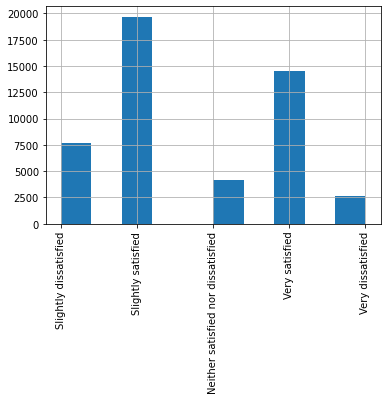

In [7]:
#Distribution of jobsatisfaction for Europe
df_all_jobsat['JobSatisfaction'][df_all_jobsat['Location'] == 'Europe'].hist();
plt.xticks(rotation=90);

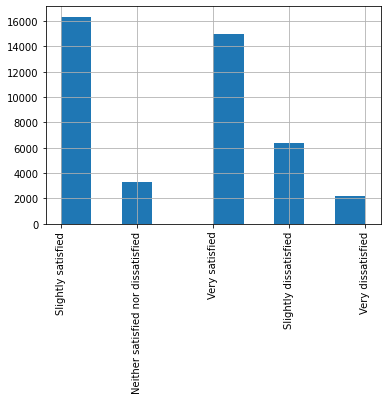

In [8]:
#Distribution of jobsatisfaction for USA
df_all_jobsat['JobSatisfaction'][df_all_jobsat['Location'] == 'United States'].hist();
plt.xticks(rotation=90);

- Since the data is normally distributed will use Mann Whiteny test to check for group differences

In [73]:
#Create a dataframe only for Europe
df_Europe = df_all_jobsat.loc[ (df_all_jobsat['Location'] == 'Europe')]
#Create a dataframe only for USA
df_USA = df_all_jobsat.loc[ (df_all_jobsat['Location'] == 'United States')] 
#Apply MannWhintey test
mannwhitneyu(df_Europe['JobSatisfaction']  , df_USA['JobSatisfaction'])   
#We will reject null hypothesis that the groups are the same, since p value is smaller than .05

MannwhitneyuResult(statistic=996210618.5, pvalue=7.459824283052915e-46)

3. How does job satisfaction compare between years 2018, 2019 and 2020 in  these locations?

Trend line from year 2018 until 2020 for both continents 

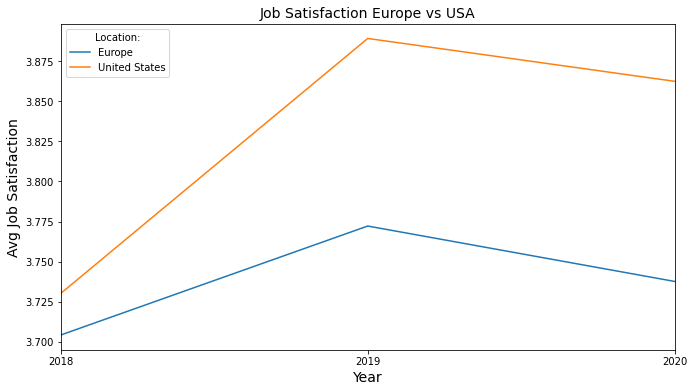

In [69]:
# Convert year from string to datetime
df_all_jobsat.Year = pd.to_datetime(df_all_jobsat.Year , format = '%Y')   

# Get the mean of based on location and year
df_all_yearly_avg = df_all_jobsat.groupby(['Location','Year']).mean()['JobSatisfaction_Ordinal']

# Create a pivot table with continents as columns and their mean values as rows
df_all_yearly_avg = df_all_yearly_avg.unstack(level='Location')
df_all_yearly_avg.columns.name = 'Location:'

# Plot the data
ax = df_all_yearly_avg.plot(figsize=(11, 6)  );
ax.set_xlabel('Year', fontsize=14);
ax.set_ylabel('Avg Job Satisfaction', fontsize=14);
ax.set_title("Job Satisfaction Europe vs USA" , fontsize=14);




4. Which are top factors Stack Overflow coders located in the happiest places in the world  consider when deciding between two job offers?  How do these factors differ between genders? 

Data Reading for year 2020

In [75]:
#Read the data only for 2020
df_2020 = pd.read_csv("survey_results_public_2020.csv")
#Differently from the function filter on all states appearing in the list of most happiest countries in the world
df_2020 = df_2020[( df_2020['Country'] == 'United States') 
                | (df_2020['Country'] == 'Finland') 
                | (df_2020['Country'] == 'Denmark')
                | (df_2020['Country'] == 'Iceland')
                | (df_2020['Country'] == 'Switzerland') 
                | (df_2020['Country'] == 'Netherlands') 
                | (df_2020['Country'] == 'Luxembourg') 
                | (df_2020['Country'] == 'Sweden') 
                | (df_2020['Country'] == 'Norway') 
                | (df_2020['Country'] == 'Austria') 
                | (df_2020['Country'] == 'Ireland') 
                | (df_2020['Country'] == 'Germany') 
                | (df_2020['Country'] == 'United Kingdom') 
                | (df_2020['Country'] == 'Czech Republic') 
                | (df_2020['Country'] == 'Belgium') 
                | (df_2020['Country'] == 'France')
                | (df_2020['Country'] == 'Israel')
                | (df_2020['Country'] == 'New Zealand')
                | (df_2020['Country'] == 'Australia')
                | (df_2020['Country'] == 'Canada')]
#Get required fields
df_job_top_factors = df_2020[[ 'Respondent' , 'Gender' , 'JobFactors']]
#Drop all null values, since I am doing only inference analysis I am not using any techinique for replacing null values
df_job_top_factors = df_job_top_factors.dropna(how='any')
#Get the counts for each gender category
df_job_top_factors['Gender'].value_counts()


Man                                                            22439
Woman                                                           2182
Non-binary, genderqueer, or gender non-conforming                261
Man;Non-binary, genderqueer, or gender non-conforming             80
Woman;Non-binary, genderqueer, or gender non-conforming           63
Woman;Man                                                         14
Woman;Man;Non-binary, genderqueer, or gender non-conforming        5
Name: Gender, dtype: int64

- Data cleaning and preparation for visualization

In [12]:
#Recplace all genders different from man and women to non-binary
df_job_top_factors.loc[~ ((df_job_top_factors['Gender'] == 'Man') | (df_job_top_factors['Gender'] == 'Woman')) , 'Gender'] = 'Non-Binary'
#check the counts again
df_job_top_factors['Gender'].value_counts()

Man           22439
Woman          2182
Non-Binary      423
Name: Gender, dtype: int64

In [13]:
#Check how the dataframe looks like
df_job_top_factors.head()

,Respondent,Gender,JobFactors
0,1,Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development"
5,6,Man,"Diversity of the company or organization;Languages, frameworks, and other technologies I’d be working with;Office environment or company culture"
7,8,Man,Remote work options;Opportunities for professional development;Family friendliness
9,10,Man,Flex time or a flexible schedule;How widely used or impactful my work output would be;Opportunities for professional development
10,11,Man,"Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options"


In [14]:
#Since one reponder can select multiple choices, split the string by ';' and convert to a dummy table 
df_dummies_final = pd.concat([df_job_top_factors['JobFactors'].str.get_dummies(sep = ';'), df_job_top_factors['Gender']], axis=1)
#Group by gender and sum the 1s for each category in the dummy table
df_dummies_grouped = df_dummies_final.groupby('Gender').sum().reset_index()
#visualize the table
df_dummies_grouped

,Gender,Diversity of the company or organization,Family friendliness,Financial performance or funding status of the company or organization,Flex time or a flexible schedule,How widely used or impactful my work output would be,Industry that I’d be working in,"Languages, frameworks, and other technologies I’d be working with",Office environment or company culture,Opportunities for professional development,Remote work options,Specific department or team I’d be working on
0,Man,1254,2910,2186,9974,5203,3825,11927,10744,8157,7309,3098
1,Non-Binary,151,26,25,174,104,83,162,226,106,140,55
2,Woman,510,257,140,989,453,338,856,1129,774,718,298


In [15]:
#Rename gender column to row num so that is displays correctly in the transposed dataset
df_dummies_grouped = df_dummies_grouped.rename(columns={"Gender":"Row_Num"})
#Transpose above datset
df_dummies_grouped_Transposed = df_dummies_grouped.T
#Get header names
new_columns = df_dummies_grouped_Transposed.iloc[0]
#Transposed column without headers
df_transp_grouped_dummies = df_dummies_grouped_Transposed[1:]
#Set new headers to the transposed dataframe
df_transp_grouped_dummies.columns = new_columns
#Set an index for the transposed dataframe
df_transp_grouped_dummies = df_transp_grouped_dummies.reset_index()
#Rename index
df_transp_grouped_dummies.rename(columns = {"index":"Job_Factor" } , inplace=True)

In [16]:
def get_gender_df(df):
   '''INPUT:
      df: dataframe  with genders as distinct columns and values as rows for each job factor
      
      OUTPUT:
      df_lst: a list with a 3 columns: Job Factor , Counts and Gender'''

   #Create an empty dataframe
   data_frames = []
   #Loop through unique genders 
   for gender in df_dummies_final.Gender.unique():
      #Create a new dataframe only for the gender in the looping valiable
      locals()['df_'+ gender ]  =  df[['Job_Factor' , gender]].sort_values(gender, ascending=False)
      #Append the dataframe to the list
      data_frames.append(locals()['df_'+ gender ])
      #Do an outer join between all dataframes
   df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Job_Factor'],  how='outer'),data_frames )
   
   #Create an empty list
   df_lst = []
   #Loop again through genders and create a dataframe with columns : Job Factor , Counts and Gender
   for gen in df_dummies_final.Gender.unique():
      locals()['df_'+ gen + '_val'] = df_merged[['Job_Factor' , gen]]
      locals()['df_'+ gen + '_val'].rename(columns ={gen :"Counts"}, inplace = True)
      locals()['df_'+ gen + '_val']['Gender'] = gen
      df_lst.append(locals()['df_'+ gen + '_val'])
   
   return df_lst


In [17]:
#Create an empty dataframe
df_final = pd.DataFrame()
#Call above function 
df_final = df_final.append(get_gender_df(df_transp_grouped_dummies)).reset_index()[['Job_Factor', 'Counts', 'Gender']]
#Display the dataframe that will be used for visualization
df_final


Row_Num,Job_Factor,Counts,Gender
0,"Languages, frameworks, and other technologies I’d be working with",11927,Man
1,Office environment or company culture,10744,Man
2,Flex time or a flexible schedule,9974,Man
3,Opportunities for professional development,8157,Man
4,Remote work options,7309,Man
5,How widely used or impactful my work output would be,5203,Man
6,Industry that I’d be working in,3825,Man
7,Specific department or team I’d be working on,3098,Man
8,Family friendliness,2910,Man
9,Financial performance or funding status of the company or organization,2186,Man


In [18]:
#Modify the test in job factor column to be wrapped 
df_final['Job_Factor'] = df_final['Job_Factor'].apply(lambda row: '\n'.join(wrap(row, 25)))
#Get the sum based on each job factor
df_grouped_JF = df_final.groupby('Job_Factor').sum()['Counts'].to_frame().reset_index()
#Find percentage for each job factor
df_grouped_JF['Percentage per job factor'] = (df_grouped_JF['Counts'] / df_grouped_JF['Counts'].sum()) * 100
#Order values by percetage per job factor in descending order
df_grouped_JF.sort_values('Percentage per job factor' , ascending=False , inplace=True)
#Create a list with orders factors, this will be used later in the chart
JF_oder_desc = list(df_grouped_JF['Job_Factor'])
#Find the sum for each gender and save it to a new dataframe
df_grouped_Gender = df_final.groupby([ "Gender"]).sum()['Counts'].to_frame().reset_index().rename(columns = {"Counts" : "Total Counts"})
#Do a left join with above dataframe 
df_perc_gender = pd.merge(df_final , df_grouped_Gender , on =["Gender"] , how ="left")
#Find percentage for each gender under a specific job factor
df_perc_gender['Percentage per gender']  = df_perc_gender['Counts'] / df_perc_gender['Total Counts'] * 100
#Display top 5 records of above dataframe
df_perc_gender.head()

,Job_Factor,Counts,Gender,Total Counts,Percentage per gender
0,"Languages, frameworks,\nand other technologies\nI’d be working with",11927,Man,66587,17.911905
1,Office environment or\ncompany culture,10744,Man,66587,16.135282
2,Flex time or a flexible\nschedule,9974,Man,66587,14.9789
3,Opportunities for\nprofessional development,8157,Man,66587,12.250139
4,Remote work options,7309,Man,66587,10.976617


- Visualize

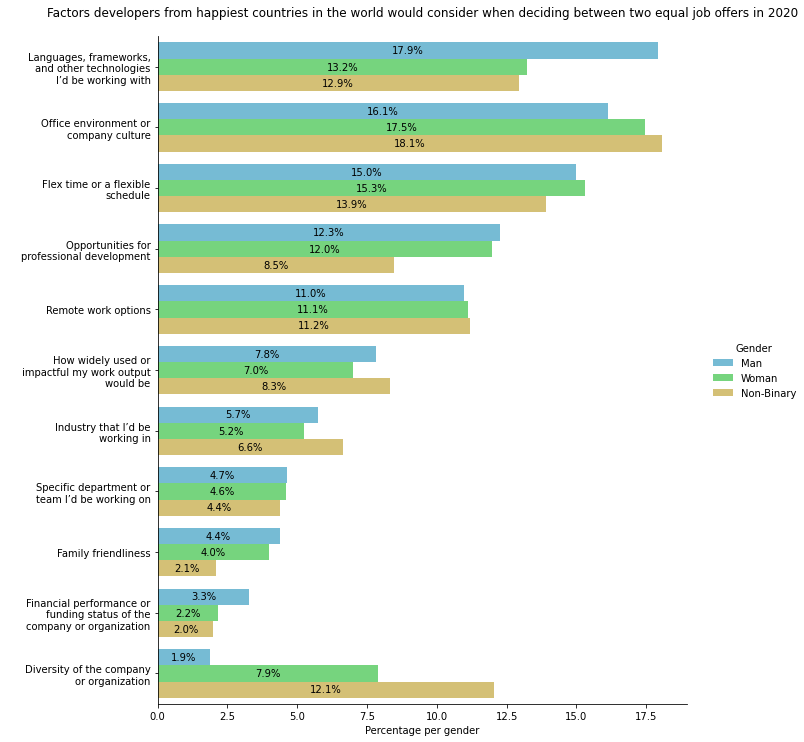

In [19]:
#Create a chart which will display percetage of each gender in the category
g  = sns.catplot(x="Percentage per gender", y="Job_Factor", data=df_perc_gender, hue="Gender", kind="bar",size= 10, 
                palette=sns.color_palette(['#66C2E4' , '#66E471' , '#E4C966' ]) , order= JF_oder_desc );

#Create a function which will display percantages as lables for each bar
def add_labels(graph, category_size,  omit_thresh, width_var, num_format):
        ax = graph.facet_axis(0,0)
        for p in ax.patches:
            if p.get_width() > omit_thresh: # omit labels close to zero or other threshold
                width = p.get_width() * width_var   # get bar length
                ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                num_format.format(p.get_width()), # set variable to display, 2 decimals
                ha = 'center',   # horizontal alignment
                va = 'center')  # vertical alignment
            else:
                pass

#Call above function and fix number format
add_labels(graph=g, category_size = len(df_perc_gender.index.unique()) , omit_thresh=0, width_var=0.5, num_format='{:.1f}%')

#Remove Y labels
plt.ylabel(" ");
#Set the title
plt.title("Factors developers from happiest countries in the world would consider when deciding between two equal job offers in 2020" , pad = 20);